## Intesnity Analysis of different images 

In [1]:
import numpy as np
#
def rgba2rgb(rgba, background = (255, 255, 255)):
    '''
    Function to convert RGBA images into RGB format. Input RGBA image (and background); output RGB image.
    '''
    rows, cols, chans = rgba.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
            return rgba
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 4, 'RGBA image must have 4 channels.'
    #
    rgb = np.zeros((rows, cols, 3), dtype = 'float32')
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    #
    a = np.asarray(a, dtype='float32')/255.0
    #
    R, G, B = background
    #
    rgb[:, :, 0] = r*a + (1.0 - a)*R
    rgb[:, :, 1] = g*a + (1.0 - a)*G
    rgb[:, :, 2] = b*a + (1.0 - a)*B
    #
    return np.asarray(rgb, dtype = np.uint8)
#
def rgb2grey(rgb, negative = 0):
    '''
    Convert RGB image to greyscale. Input RGB (and flag indicating negative required), output greyscale image.
    '''
    rows, cols, chans = rgb.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
        elif chans == 1:
            print("Greyscale image")
            return rgb
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 3, 'RGB image must have 3 channels.'
    #
    grey = np.zeros((rows, cols), dtype = 'float32')
    #
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #
    grey[:, :] = (0.2125*(r*negative + (negative - 1.0)*r) + 
                  0.7154*(g*negative + (negative - 1.0)*g) + 
                  0.0721*(b*negative + (negative - 1.0)*b))
    #
    return np.asarray(grey, dtype = np.uint8)
#
def ceilDiv(a, b):
    '''
    Return a//b rounded up.
    '''
    ceiling = -(-a//b)
    return ceiling

Date and time  2021-03-30 16:18:05.474155
Type of raw image file is uint8
Type of greyscale image file is uint8
Number of rows 1040 of columns 1392 of pixels 1447680 and depth 3
Maximum value in pixels 255
 
Number of thresholds 2
Number of rows in figure 3
 


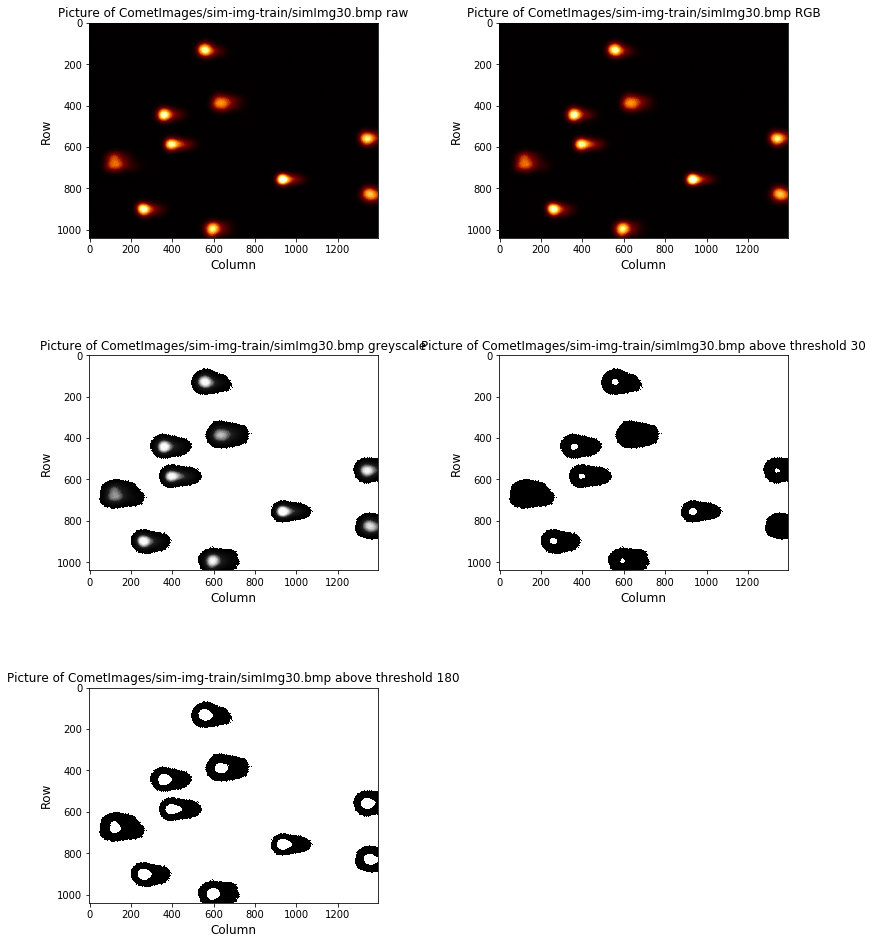

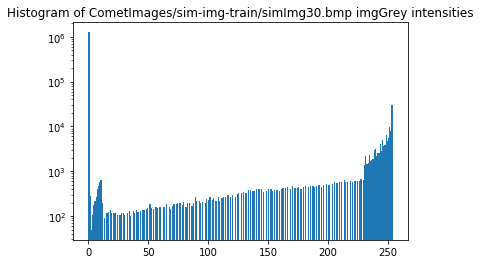

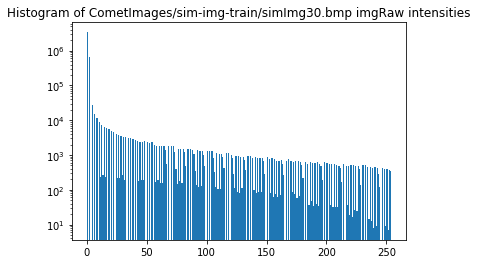

 
Date and time 2021-03-30 16:18:08.192181
Time since last check is 0:00:02.718026


In [6]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import sys
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
# 
imFile = "CometImages/sim-img-train/simImg30.bmp"
imgRaw = plt.imread(imFile)
#
# Number of rows and columns. Depth is 3 for RGB, 4 for RGBA image. A is opacity (alpha)
nRows = imgRaw.shape[0] 
nCols = imgRaw.shape[1]
nDepth = imgRaw.shape[2]
#
# Set thresholds for applying to image (lowest to highest)
#thresh = np.array([10, 180]) 
thresh = np.array([30, 180]) 
nThresh = len(thresh)
img = np.zeros((nRows, nCols))
imgThr = np.zeros((nRows, nCols, nThresh))
#
# Determine image format and process accordingly
if nDepth == 4:
    imgRGB = rgba2rgb(imgRaw)
    imgGrey = rgb2grey(imgRGB, 1)
elif nDepth == 3:
    imgRGB = imgRaw
    imgGrey = rgb2grey(imgRGB, 0)
elif nDepth == 1:
    imgRGB = imgRaw
    imgGrey = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
maxPix = np.amax(imgGrey)
img1 = imgGrey

print("Type of raw image file is",imgRaw.dtype)
print("Type of greyscale image file is",imgGrey.dtype)
print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
print("Maximum value in pixels", maxPix)
#
# Plot image at various stages of processing
nFigRows = 2 + ceilDiv(nThresh, 2)
print(" ")
print("Number of thresholds",nThresh)
print("Number of rows in figure",nFigRows)
for nT in range(0, nThresh):
    imgThr[:, :, nT] = imgGrey > thresh[nT]
#
print(" ")
fig = plt.figure(figsize=(nFigRows*4, 14))
fig.add_subplot(nFigRows, 2, 1)
plt.title("Picture of " + imFile + " raw")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRaw, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 2)
plt.title("Picture of " + imFile + " RGB")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRGB, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 3)
plt.title("Picture of " + imFile + " greyscale")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgGrey, cmap = "Greys")
#
for nT in range(0, nThresh):
    fig.add_subplot(nFigRows, 2, 4 + nT)
    plt.title("Picture of " + imFile + " above threshold " + str(thresh[nT]))
    plt.xlabel('Column', fontsize = 12)
    plt.ylabel('Row', fontsize = 12)
    imgplot = plt.imshow(imgThr[:, :, nT], cmap = "Greys")
#
plt.tight_layout()
plt.show()
#
#plot intensities of image
fig, ax = plt.subplots(1)
plt.title("Histogram of " + str(imFile) + " imgGrey intensities")
n, bins, patches = ax.hist(imgGrey.flatten(), bins=np.arange(0, maxPix, 1), log=True, label='Simulated')
plt.show()
#
fig, ax = plt.subplots(1)
plt.title("Histogram of " + str(imFile) + " imgRaw intensities")
n, bins, patches = ax.hist(imgRaw.flatten(), bins=np.arange(0, maxPix, 1), log=True, label='Simulated')
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Type of raw image file is uint8
Type of greyscale image file is uint8
Number of rows 520 of columns 696 of pixels 361920 and depth 4
Maximum value in pixels 244
 
Number of thresholds 2
Number of rows in figure 3
 


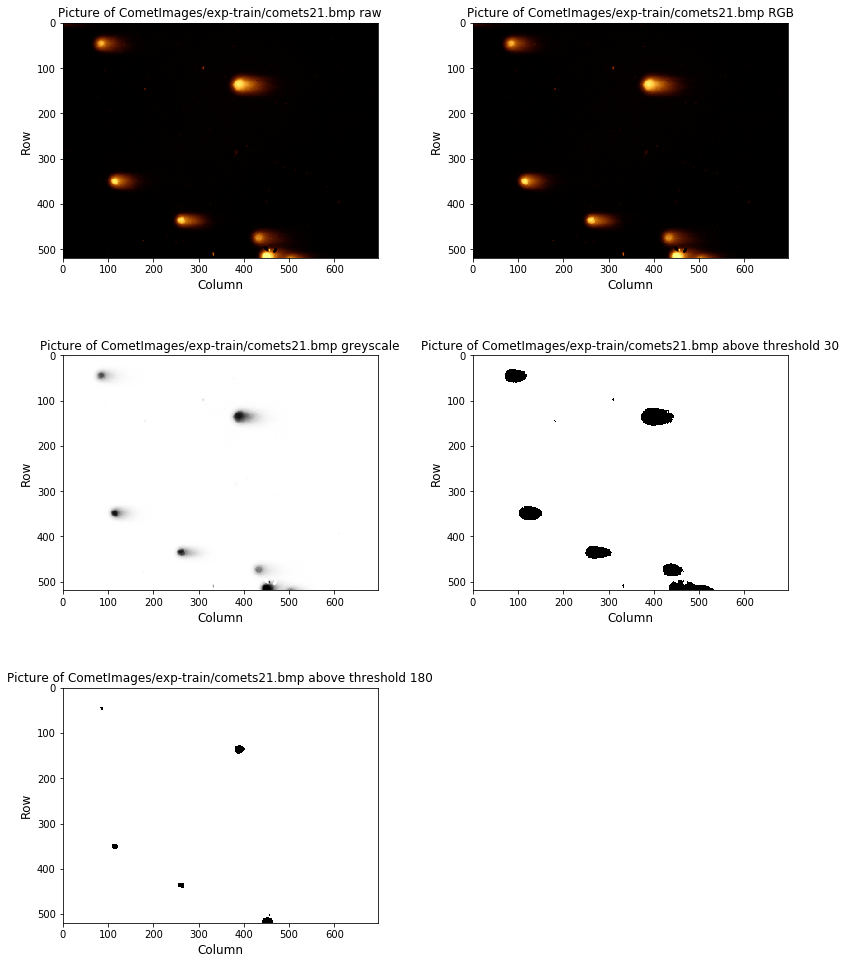

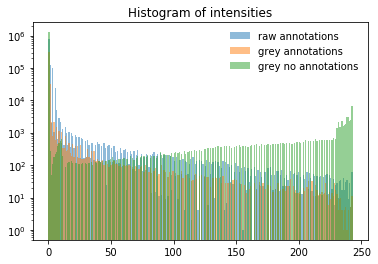

In [7]:
import sys
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
# 
imFile = "CometImages/exp-train/comets21.bmp"
imgRaw = plt.imread(imFile)
#
# Number of rows and columns. Depth is 3 for RGB, 4 for RGBA image. A is opacity (alpha)
nRows = imgRaw.shape[0] 
nCols = imgRaw.shape[1]
nDepth = imgRaw.shape[2]
#
# Set thresholds for applying to image (lowest to highest)
#thresh = np.array([10, 180]) 
thresh = np.array([30, 180]) 
nThresh = len(thresh)
img = np.zeros((nRows, nCols))
imgThr = np.zeros((nRows, nCols, nThresh))
#
# Determine image format and process accordingly
if nDepth == 4:
    imgRGB = rgba2rgb(imgRaw)
    imgGrey = rgb2grey(imgRGB, 1)
elif nDepth == 3:
    imgRGB = imgRaw
    imgGrey = rgb2grey(imgRGB, 0)
elif nDepth == 1:
    imgRGB = imgRaw
    imgGrey = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
maxPix = np.amax(imgGrey)

print("Type of raw image file is",imgRaw.dtype)
print("Type of greyscale image file is",imgGrey.dtype)
print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
print("Maximum value in pixels", maxPix)
#
# Plot image at various stages of processing
nFigRows = 2 + ceilDiv(nThresh, 2)
print(" ")
print("Number of thresholds",nThresh)
print("Number of rows in figure",nFigRows)
for nT in range(0, nThresh):
    imgThr[:, :, nT] = imgGrey > thresh[nT]
#
print(" ")
fig = plt.figure(figsize=(nFigRows*4, 14))
fig.add_subplot(nFigRows, 2, 1)
plt.title("Picture of " + imFile + " raw")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRaw, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 2)
plt.title("Picture of " + imFile + " RGB")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRGB, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 3)
plt.title("Picture of " + imFile + " greyscale")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgGrey, cmap = "Greys")
#
for nT in range(0, nThresh):
    fig.add_subplot(nFigRows, 2, 4 + nT)
    plt.title("Picture of " + imFile + " above threshold " + str(thresh[nT]))
    plt.xlabel('Column', fontsize = 12)
    plt.ylabel('Row', fontsize = 12)
    imgplot = plt.imshow(imgThr[:, :, nT], cmap = "Greys")
#
plt.tight_layout()
plt.show()
#
#plot intensities of image - Annotations in label refers to an image that annotations were possbile from using watershed method
fig, ax = plt.subplots(1)
plt.title("Histogram of intensities")
n, bins, patches = ax.hist(imgRaw.flatten(), bins=np.arange(0, maxPix, 1), log=True, alpha = 0.5, label='raw annotations')
n, bins, patches = ax.hist(imgGrey.flatten(), bins=np.arange(0, maxPix, 1), log=True, alpha = 0.5, label='grey annotations')
n, bins, patches = ax.hist(img1.flatten(), bins=np.arange(0, maxPix, 1), log=True, alpha = 0.5, label='grey no annotations')
ax.legend(loc='best', frameon=False)
plt.show()
#